In [1]:
%matplotlib inline

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import random
from time import time
import secrets
from numpy.polynomial import Polynomial as Poly
from sympy.ntheory import factorint
from sympy.ntheory import primefactors
from turtle import *


# Basic Algebra Exercise
## Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

### Problem 1. Polynomial Interpolation
We know that if we have a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, we can try to figure out what function may have generated these points.

Please note that **our assumptions about the data** will lead us to choosing one function over another. This means that our results are as good as our data and assumptions. Therefore, it's extremely important that we write down our assumptions (which sometimes can be difficult as we sometimes don't realize we're making them). It will be better for our readers if they know what those assumptions and models are.

In this case, we'll state two assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

This method is called *polynomial interpolation* (*"polynomial"* captures assumption 1 and *"interpolation"* captures assumption 2).

It can be proved (look at [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation) for example) that if we have $n$ data points, there is only one polynomial of degree $n-1$ which passes through them. In "math speak": "the vector spaces of $n$ points and polynomials of degree $n-1$ are isomorphic (there exists a bijection mapping one to the other)".

There are a lot of ways to do interpolation. We can also write the function ourselves if we want but this requires quite a lot more knowledge than we already covered in this course. So we'll use a function which does this for us. `numpy.polyfit()` is one such function. It accepts three main parameters (there are others as well, but they are optional): a list of $x$ coordinates, a list of $y$ coordinates, and a polynomial degree.

Let's say we have these points:
```python
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
```

First, we need to "extract" the coordinates:
```python
x = points[:, 0]
y = points[:, 1]
```

Then, we need to calculate the interpolating polynomial. For the degree, we'll initially set $n-1$:
```python
coefficients = np.polyfit(x, y, len(points) - 1)
poly = np.poly1d(coefficients)
```

After that, we need to plot the function. To do this, we'll create a range of $x$ values and evaluate the polynomial at each value:
```python
plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)
```

Finally, we need to plot the result. We'll plot both the fitting polynomial curve (using `plt.plot()`) and the points (using `plt.scatter`). It's also nice to have different colors to make the line stand out from the points.
```python
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```
Don't forget to label the axes!

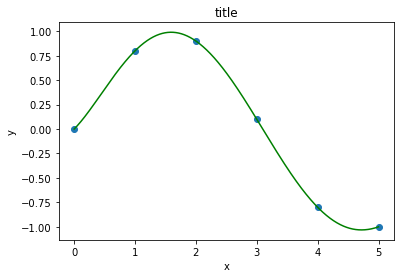

In [3]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
x = points[:, 0]
y = points[:, 1]
coefficients = np.polyfit(x, y, len(points) - 1)
poly = np.poly1d(coefficients)
plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.title("title")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Your task now is to **wrap the code in a function**. It should accept a list of points, the polynomial degree, min and max value of $x$ used for plotting. **Be extremely careful to ensure that the function uses its parameters!** Of course, you can extract other utility functions if you wish (e.g., separating plotting from the rest is a good idea).

We'll use this function to try some other cases.

In [4]:
def interpolate_polynomial(points, degree, min_x, max_x, title=None, add_func=None):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """
    pts = np.array(points)
    x = pts[:, 0]
    y = pts[:, 1]
    p = Poly.fit(x, y, degree)
    p = p.convert(domain=[min_x, max_x])
    p_plot = p.linspace(1000)
    plt.plot(p_plot[0], p_plot[1], c="green")
    
    if add_func:
        v_y = np.vectorize(add_func)
        x2 = np.linspace(min_x, max_x, 1000)
        y2 = v_y(x2)
        plt.plot(x2, y2, c="blue")
    
    if title:
        plt.title(title)
    else:
        plt.title(f'Polynomial of degree {degree}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(x, y)
    plt.show()

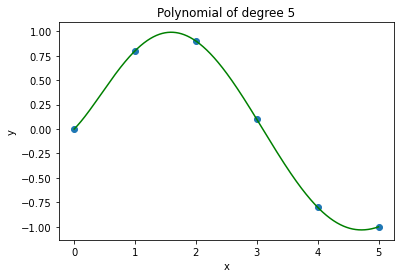

In [5]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see this is a very nice fit. This is expected, of course. Let's try to expand our view a little. Let's try to plot other values of $x$, further than the original ones. This is **extrapolation**.

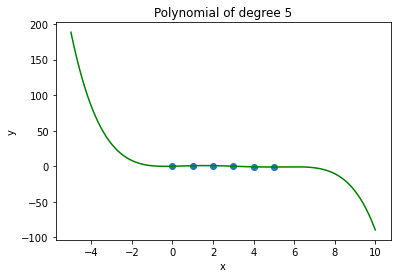

In [6]:
interpolate_polynomial(points, len(points) - 1, -5, 10)

Hmmm... it seems our polynomial goes a little wild outside the original range. This is to show how **extrapolation can be quite dangerous**.

Let's try a lower polynomial degree now. We used 4, how about 3, 2 and 1?
**Note:** We can add titles to every plot so that we know what exactly we're doing. Te title may be passed as an additional parameter to our function.

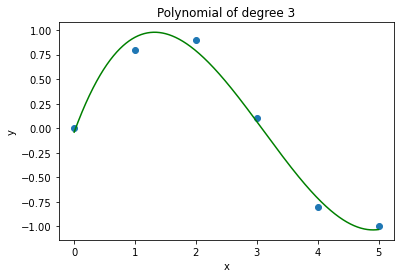

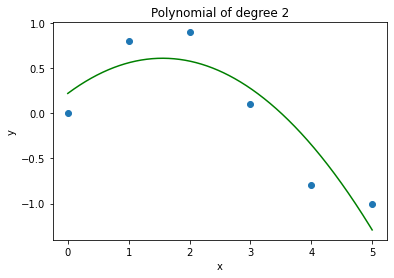

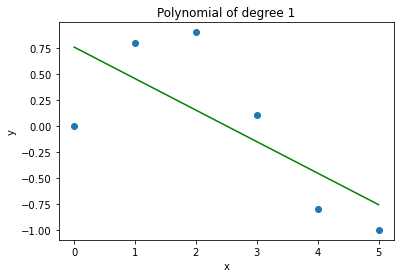

In [7]:
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see the fitting curves (or line in the last case) struggle more and more and they don't pass through every point. This breaks our assumptions but it can be very useful.

Okay, one more thing. How about increasing the degree? Let's try 5, 7 and 10. Python might complain a little, just ignore it, everything is fine... sort of :).

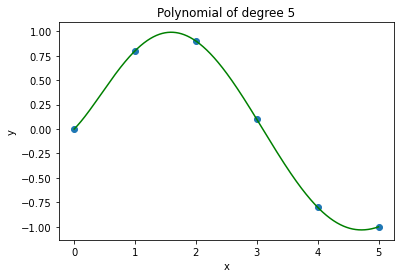

C:\Users\Tankishevi\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


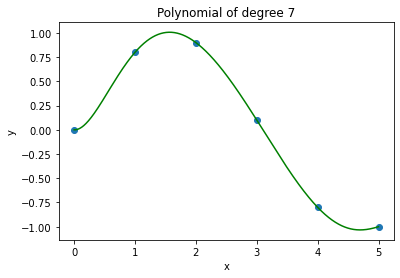

C:\Users\Tankishevi\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


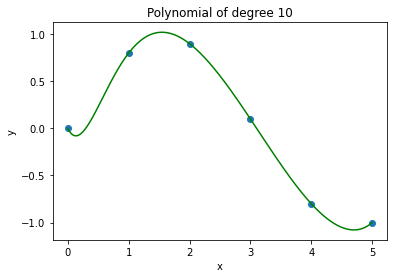

In [8]:
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]))

Those graphs look pretty much the same. But that's the point exactly. I'm being quite sneaky here. Let's try to expand our view once again and see what our results really look like.

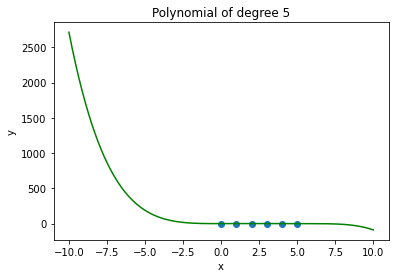

C:\Users\Tankishevi\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


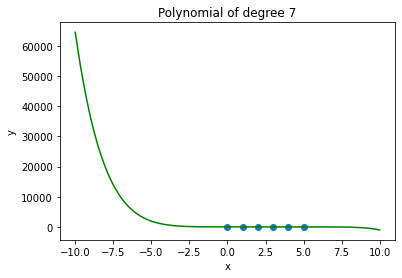

C:\Users\Tankishevi\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


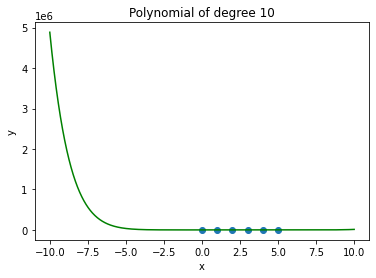

In [9]:
interpolate_polynomial(points, 5, -10, 10)
interpolate_polynomial(points, 7, -10, 10)
interpolate_polynomial(points, 10, -10, 10)

Now we see there are very wild differences. Even though the first two plots look quite similar, look at the $y$ values - they're quite different.

So, these are the dangers of interpolation. Use a too high degree, and you get "the polynomial wiggle". These are all meant to represent **the same** data points but they look insanely different. Here's one more comparison.

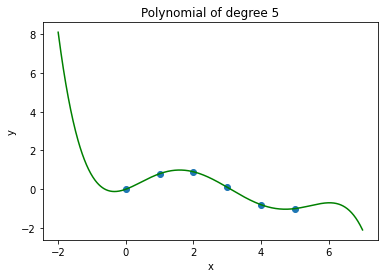

C:\Users\Tankishevi\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


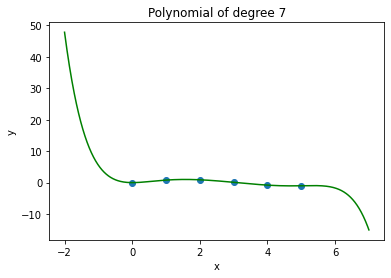

In [10]:
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

Now we can see what big difference even a small change in degree can make. This is why we have to choose our interpolating functions very carefully. Generally, a lower degree means a simpler function, which is to be preferred. See [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

And also, **we need to be very careful about our assumptions**.

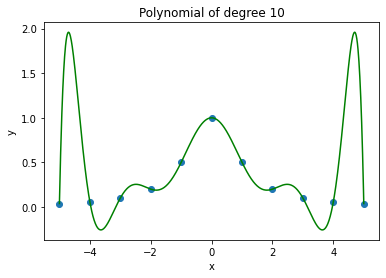

In [11]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This one definitely looks strange. Even stranger, if we remove the outermost points... ($x = \pm 5$), we get this

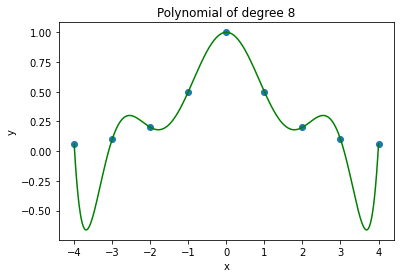

In [12]:
points = np.array([(-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This is because the generating function is not a polynomial. It's actually:
$$ y = \frac{1}{1 + x^2} $$

Plot the polynomial interpolation and the real generating function **on the same plot**. You may need to modify the original plotting function or just copy its contents.

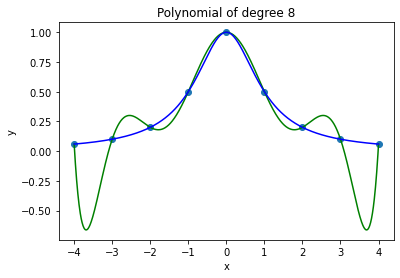

In [13]:
points = np.array([(-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]), add_func=lambda x: 1 / (1 + x**2))

### Problem 2. Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-3, 4))
plt.yticks(range(-3, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

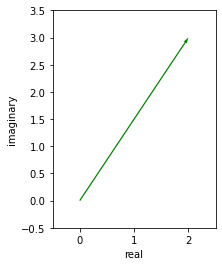

In [26]:
def plot_complex_numbers(numbers, colors=None):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    # Write your code here
    ax = plt.gca()
    ax.set_aspect("equal")
    
    X = [0 for _ in range(len(numbers))]
    Y = X
    U = np.array([n.real for n in numbers])
    V = np.array([n.imag for n in numbers])
    if not colors:
        colors = 'green'
    x_min = min(U.min(), 0) - 0.5
    x_max = max(U.max(), 0) + 0.5
    y_min = min(V.min(), 0) - 0.5
    y_max = max(V.max(), 0) + 0.5
        
    ax.quiver(X, Y, U, V, angles = "xy", scale_units = "xy", scale = 1, color=colors)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.xlabel("real")
    plt.ylabel("imaginary")
    plt.show()
    
plot_complex_numbers([2 + 3j])

How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

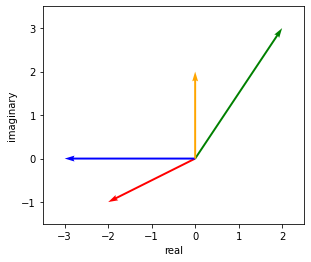

In [28]:
plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's add two numbers and plot the result.

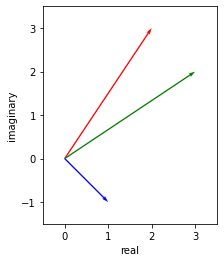

In [29]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

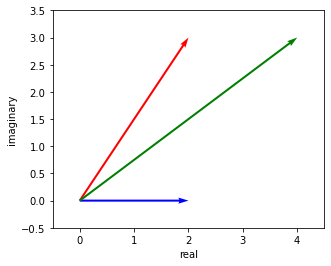

In [30]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

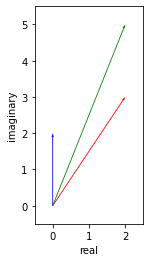

In [31]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

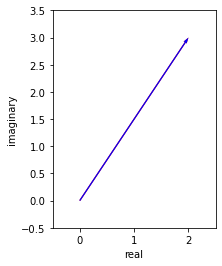

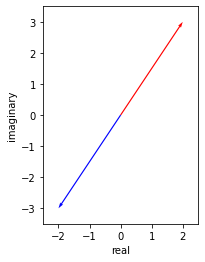

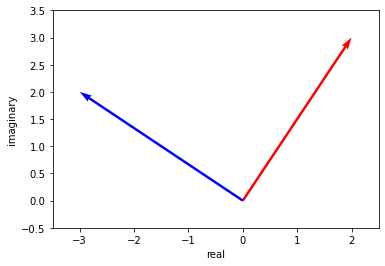

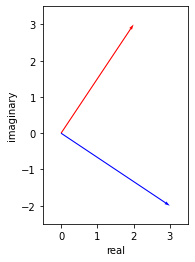

In [32]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"])
plot_complex_numbers([z, z * -1], ["red", "blue"])
plot_complex_numbers([z, z * 1j], ["red", "blue"])
plot_complex_numbers([z, z * -1j], ["red", "blue"])

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

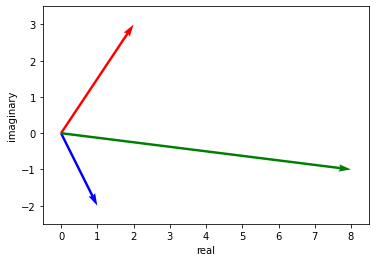

In [33]:
z1 = 2 + 3j
z2 = 1 - 2j
plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])

### Problem 3. Recursion and Fractals
<img src="recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. And I'm not talking about Fibonacci here. Let's draw a tree using recursive functions.

The figure we're going to draw is called a **fractal**. It's self-similar, which means that if you zoom in on a part of it, it will look the same. You can see fractals everywhere in nature, with broccoli being one of the prime examples. Have a look:

<img src="broccoli.jpg" style="max-height: 300px" />

First, we need to specify the recursive part. In order to draw a tree, we need to draw a line of a given length (which will be the current branch), and then draw two more lines to the left and right. By "left" and "right", we should mean "rotation by a specified angle".

So, this is how to draw a branch: draw a line and prepare to draw two more branches to the left and right. This is going to be our recursive call.

To make things prettier, more natural-looking (and have a natural end to our recursion), let's draw each "sub-branch" a little shorter. If the branch becomes too short, it won't have "child branches". This will be the bottom of our recursion.

There's one more important part of recursion, and this is **"the clean-up"**. After we did something in the recursive calls, it's very important to return the state of everything as it was **before** we did anything. In this case, after we draw a branch, we go back to our starting position. 

Let's first import the most import-ant (no pun intended...) Python drawing library: `turtle`! In order to make things easier, we'll import all methods directly.
```python
from turtle import *
```

You can look up the docs about turtle if you're more interested. The basic things we're going to use are going forward and backward by a specified number of pixels and turning left and right by a specified angle (in degrees).

Let's now define our recursive function:
```python
def draw_branch(branch_length, angle):
    if branch_length > 5:
        forward(branch_length)
        right(angle)
        draw_branch(branch_length - 15, angle)
        left(2 * angle)
        draw_branch(branch_length - 15, angle)
        right(angle)
        backward(branch_length)
```

And let's call it:
```python
draw_branch(100, 20)
```

We need to start the tree not at the middle, but toward the bottom of the screen, so we need to make a few more adjustments. We can wrap the setup in another function and call it. Let's start one trunk length below the center (the trunk length is the length of the longest line).

**Note:** It's important to call `done()` after the drawing is finished. If you miss it, the window with the turtle drawing will freeze and throw an exception.

```python
def draw_tree(trunk_length, angle):
    speed("fastest")
    left(90)
    up()
    backward(trunk_length)
    down()
    draw_branch(trunk_length, angle)
    done()
```

Note that the graphics will show in a separate window. Also note that sometimes you might get bugs. If you do, go to Kernel > Restart.

In [34]:
# Write your code here
def draw_branch(branch_length, angle):
    if branch_length > 5:
        forward(branch_length)
        right(angle)
        draw_branch(branch_length - 15, angle)
        left(2 * angle)
        draw_branch(branch_length - 15, angle)
        right(angle)
        backward(branch_length)

def draw_tree(trunk_length, angle):
    speed("fastest")
    left(90)
    up()
    backward(trunk_length)
    down()
    draw_branch(trunk_length, angle)
    done()

In [37]:
draw_tree(100, 20)

<img src="three_1.png" style="max-height: 300px" />

Experiment with different lengths and angles. Especially interesting angles are $30^\circ$, $45^\circ$, $60^\circ$ and $90^\circ$.

In [39]:
draw_tree(100, 30)

<img src="three_2.png" style="max-height: 300px" />

In [41]:
draw_tree(100, 45)

<img src="three_3.png" style="max-height: 300px" />

In [43]:
draw_tree(100, 90)

<img src="three_4.png" style="max-height: 300px" />

Now modify the original function a little. Draw the lines with different thickness. Provide the trunk thickness at the initial call. Similar to how branches go shorter, they should also go thinner.

In [45]:
# Write your code here
def draw_branch(branch_length, angle, thickness):
    if branch_length > 5:
        width(thickness)
        forward(branch_length)
        right(angle)
        draw_branch(branch_length - 15, angle, thickness * .75)
        left(2 * angle)
        draw_branch(branch_length - 15, angle, thickness * .75)
        right(angle)
        backward(branch_length)

def draw_tree(trunk_length, angle, thickness):
    speed("fastest")
    color("tan4")
    width(thickness)
    left(90)
    up()
    backward(trunk_length)
    down()
    draw_branch(trunk_length, angle, thickness)
    done()

draw_tree(100, 25, 10)

<img src="three_5.png" style="max-height: 300px" />

#### * Optional problem
Try to draw another kind of fractal graphic using recursion and the `turtle` library. Two very popular examples are the "Koch snowflake" and the "Sierpinski triangle". You can also modify the original tree algorithm to create more natural-looking trees. You can, for example, play with angles, number of branches, lengths, and widths. The Internet has a lot of ideas about this :). Hint: Look up **"L-systems"**.

In [49]:
def draw_branch(branch_length, angle, thickness):
    if branch_length > 5:
        width(thickness)
        forward(branch_length)
        right(angle)
        draw_branch(branch_length * random.random(), angle, thickness * .75)
        left(2 * angle)
        draw_branch(branch_length * .7, angle, thickness * .75)
        right(angle)
        backward(branch_length)

def draw_tree(trunk_length, angle, thickness):
    speed("fastest")
    color("tan4")
    width(thickness)
    left(90)
    up()
    backward(trunk_length)
    down()
    draw_branch(trunk_length, angle, thickness)
    done()

draw_tree(100, 25, 10)

<img src="three_6.png" style="max-height: 300px" />

### Problem 4. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [51]:
def encode(text):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    retval = text[0]
    n = 1
    for i in range(1, len(text)):
        if text[i] == retval[-1]:
            n += 1
        else:
            if n > 1:
                retval += str(n)
            retval += text[i]
            n = 1
    if n > 1:
        retval += str(n)
    return retval

def decode(text):
    """
    Decodes the text using run-length encoding
    """
    retval = ''
    for ch in text:
        if ch.isnumeric():
            retval += retval[-1] * (int(ch) - 1)
        else:
            retval += ch
    return retval

In [52]:
# Tests
# Test that the functions work on their own
assert encode("AABCCCDEEEE") == "A2BC3DE4"
assert decode("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"

In [53]:
test_sequence = """
ctatcagctatatttttcttagtagttccagcgcctgtcgcggcaatcgtgaaatgtgct
tggagtcgactgtctgggactcggctacagctcctatccgaagctagtcggtaataagat
catcgaaacgatggctttaacggtgtttcccaggagccggttgtccagtcagctcgtatt
actctacttggggtacatcagcttttaaccaaagctcctacgcacaacaaactgcggtac
agtgtgcggtgcgtgcccctagaatatttcacgggtgcagggactatctcccgtgaactg
ccgcagtcagactattggggctcaggtacaggttgtaaacttgcgtatacgacactcatc
caagtttgtgatcccgcgacattgaacaacaagaatgagacggtaaacataagaaacaat
atcatgacatttttacacattttattcgggtcagataggacatgtgactcgactacagat
gtcaactgatcctgctcccacggactgaatgataaaagtccttacagagccggagaatat
tacctgggcacctttggagccagaaagatgattttagtacttgaggcaaaaccgtcccct
aagactaacattgggattcacccgctgtttcggtacccggtgacgatgacccgttacgac
agcgaacgtaacttccccttgctaagttgaacaggatgtacgccagaggtcactcactac
gacgggttcgataactgcatgttattgcaagaacgccctgcacggcgactcgagaaccct
gttgatgacaaacccattcggatgcgattacagttttccagcatatgcataaacgataag
caacttgttgtggtattattacaaataggctgagttacgggacatctgcgacccattccc
ttacgaaagcagagagcccgagcaataagatacgcctctctcatgcaactttaacccgtc
cttcgtagtacacggcctattacccggtacccacctgagt"""

result = len(test_sequence)/len(encode(test_sequence))

print(f'Compression ratio: {result:.2f}')

Compression ratio: 1.08


### * Problem 5. Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment.

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example.

Specify a sequence of bit lengths, in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computer's abilities you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

In [54]:
# Write your code here
def measure_time(verbose=False):
    def wrapper(func):
        def inner(*args, **kwargs):
            start = time.time()
            retval = func(*args, **kwargs)
            exec_time = time.time() - start
            if verbose:
                print(f"Function '{func.__name__}' runtime (sec): {exec_time}")
            return exec_time, retval
        return inner
    return wrapper


def list_generator(start: int, step: int, number: int) -> list:
    """
    Generates a list with 'number' of integers.
    The first one equals to 'start' and every consequtive is increased by 'step'.
    """
    i = start
    retval = [i]
    for n in range(number):
        i += step
        retval.append(i)
    return retval


@measure_time()
def get_factors(number: int) -> dict:
    return factorint(number)

@measure_time()
def multiply_factors(factors: dict) -> int:
    retval = 1
    for k, v in factors.items():
        retval *= k * v
    return retval


def get_runtimes(n_bits: int, samples: int=1) -> tuple:    
    fact_list = []
    prod_list = []
    
    for i in range(samples):
        number = secrets.randbits(n_bits)
        factor_time, factors = get_factors(number)
        fact_list.append(factor_time)
        multiply_time, result = multiply_factors(factors)
        prod_list.append(multiply_time)
    return sum(fact_list)/samples, sum(prod_list)/samples


def main(verbose=False):
    SAMPLE_SIZE = 10
    bitsizes = [16, 32, 48, 64, 80, 96, 112, 128]
    
    retval = []
    for n_bits in bitsizes:
        factor_time, multiply_time = get_runtimes(n_bits, SAMPLE_SIZE)
        retval.append((n_bits, factor_time, multiply_time))
        if verbose:
            print(f'\n{n_bits} bits number\n\tavg. factoring time (sec):{factor_time}\n\tavg. product time (sec):{multiply_time}')
    return retval

p5_data = main(True)


16 bits number
	avg. factoring time (sec):0.0
	avg. product time (sec):0.0

32 bits number
	avg. factoring time (sec):0.00039992332458496096
	avg. product time (sec):0.0

48 bits number
	avg. factoring time (sec):0.0015977144241333008
	avg. product time (sec):0.0

64 bits number
	avg. factoring time (sec):0.003502678871154785
	avg. product time (sec):0.0

80 bits number
	avg. factoring time (sec):0.0015972375869750977
	avg. product time (sec):0.0

96 bits number
	avg. factoring time (sec):0.17370858192443847
	avg. product time (sec):0.00010306835174560547

112 bits number
	avg. factoring time (sec):1.033999490737915
	avg. product time (sec):0.0

128 bits number
	avg. factoring time (sec):1.1454092025756837
	avg. product time (sec):0.0


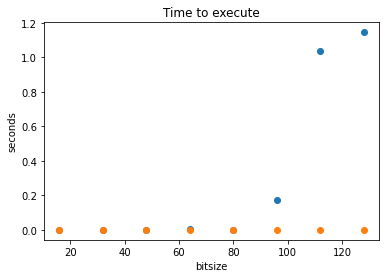

In [55]:
x = [el[0] for el in p5_data]
y1 = [el[1] for el in p5_data]
y2 = [el[2] for el in p5_data]

plt.scatter(x, y1)
plt.scatter(x, y2)
plt.title("Time to execute")
plt.xlabel("bitsize")
plt.ylabel("seconds")
plt.show()

### * Problem 6. Diffie - Hellman Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

#### Solution
This solution has some classes in it since I wanted to make the simulation like a program.
The first element is a function to check if a number if prime or not as we will need to work with prime numbers.

In [58]:
def is_prime(n: int, k=10) -> bool:
    """
    Function to test if a number is prime using basic rules and a Miller test.
    """
    low_primes = [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97
                  , 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179
                  , 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269
                  , 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367
                  , 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461
                  , 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571
                  , 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661
                  , 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773
                  , 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883
                  , 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]

    def power(x: int, y: int, p: int) -> int:
        res = 1
        x = x % p
        while y > 0:
            if y & 1:
                res = (res * x) % p
            y = y >> 1
            x = (x * x) % p
        return res

    def miller_test() -> bool:
        d = n - 1
        while d % 2 == 0:
            d //= 2

        a = 2 + random.randint(1, n - 4)
        x = power(a, d, n)
        if x == 1 or x == n - 1:
            return True
        while d != n - 1:
            x = (x * x) % n
            d *= 2
            if x == 1:
                return False
            if x == n - 1:
                return True
        return False

    if n == 2 or n in low_primes:
        return True
    if n % 2 == 0 or ((n ** 2) - 1) % 12 != 0:
        return False
    if any(n % p == 0 for p in low_primes):
        return False
    for i in range(k):
        if not miller_test():
            return False
    return True


Next is a class to simulate the connection between the parties

In [62]:
class Connection:
    """
    The connection object stores the public key and the list of exchnaged messages 
    that each user ran read (including the man in the middle).
    """
    
    def __init__(self, pbk_nbits: int) -> None:
        """
        Initiate new connection class object with the size of the public key in number of bits.
        """
        self.pbk_nbits = pbk_nbits
        self.pbk = self.__gen_pbk()
        self.messages = []

    def send_message(self, sender_name: str, message: str) -> None:
        self.messages.append((sender_name, message))

    def __gen_pbk(self) -> tuple:
        p = self.__gen_prime()
        pf = primefactors(p - 1)
        for n in range(2, p):
            is_primitive = True
            if any(n ** ((p-1)//i) % p == 1 for i in pf):
                is_primitive = False
            if is_primitive:
                return p, n

    def __str__(self):
        return f'Connection public key (prime, base): {self.pbk}'

    def __gen_prime(self) -> int:
        while True:
            n = secrets.randbits(self.pbk_nbits)
            if n % 2 == 0:
                continue
            if is_prime(n):
                return n

Next is a class to simuilate the parties participating in the connection

In [63]:
class User:
    """
    The user class stores the public and private keys of each party.
    The class has methods to generate private and public keys and exchange keys
    """
    
    def __init__(self, name: str) -> None:
        self.name = name
        self.connection = None
        self.keys = dict()

    def connect(self, connection: Connection) -> None:
        """
        Sets the connection to be used by the user. 
        Deletes old keys and generate new ones.
        """
        if self.connection != connection:
            self.connection = connection
            self.keys.clear()
            self.generate_keys()

    def generate_keys(self) -> None:
        """
        Generates public and private key for the user
        """
        if self.connection:
            p, g = self.connection.pbk
            pk = secrets.randbelow(p)
            pbk = g ** pk % p
            self.keys['private'] = pk
            self.keys['public'] = pbk

    def exchange_pbk(self) -> None:
        """
        Sends the users public key over the connection
        """
        if self.connection:
            pbk = self.keys.get('public')
            self.connection.send_message(self.name, f'pbk:{pbk}')

    def generate_sk(self):
        """
        Generates the shared key
        """
        if self.connection:
            messages = [msg for sender, msg in self.connection.messages if sender != self.name]
            other_pbk = next(el.split(':')[1] for el in messages if 'pbk:' in el)
            if other_pbk:
                p = self.connection.pbk[0]
                pk = self.keys.get('private')
                sk = (int(other_pbk) ** pk) % p
                self.keys['shared'] = sk

    def __str__(self):
        return f'\nUser: {self.name}' \
               f'\nKeys: {self.keys}'

The last one is the class that will simulate the Diffie Hellman exchange.

In [64]:
class Simulation:
    """
    Simulate the Diffie Hellman exchange.
    Stores information for the connection and the connected users.
    Has methods to add user, generate shared key, and crack the shared key.
    """
    
    def __init__(self, connection: Connection) -> None:
        self.connection = connection
        self.users = []

    def add_person(self, name: str):
        if name not in [user.name for user in self.users]:
            self.users.append(User(name))

    def generate_sks(self, verbose=False):
        """
        Generates shared keys and measures the time to do so
        """
        start = time()
        for user in self.users:
            user.connect(self.connection)
            user.exchange_pbk()
        for user in self.users:
            user.generate_sk()
            if verbose:
                print(user)
        exec_time = time() - start
        if verbose:
            print(f"Time to generate shared keys (sec): {exec_time}")

    def crack_sk(self, verbose=False):
        """
        Cracks the shared keys and measures teh time to do so.
        """
        start = time()
        pbks = {user.name: user.keys.get('public') for user in self.users}
        p, g = self.connection.pbk
        for pk_guess in range(1, p):
            pbk = g ** pk_guess % p
            if pbk in pbks.values():
                exec_time = time() - start
                if verbose:
                    username = next(name for name, key in pbks.items() if key == pbk)
                    other_pbk = next(item for item in pbks.values() if item != pbk)
                    sk = other_pbk ** pk_guess % p
                    print(f"Found {username}'s pk: {pk_guess}")
                    print(f"Shared key: {sk}")
                    print(f"Time to find shared key (sec): {exec_time}")
                return exec_time


Now to run the simulation.

In [84]:
def run_sims(n_bits, attempts, verbose=False):
    results = []
    for i in range(attempts):
        conn = Connection(n_bits)
        if verbose:
            print(conn)
        sim = Simulation(conn)
        sim.add_person('Alice')
        sim.add_person('Bob')
        sim.generate_sks(verbose)
        results.append(sim.crack_sk(verbose))
    return results


# Uncomment the code below to run.
# Run with 'verbose=True' to see the actual keys for the connection and each party

# target_average_time = 15
# avg_crack_time = 0
# nbits = 8
# while avg_crack_time <= target_average_time:
#     results = run_sims(nbits, 10, False)
#     avg_crack_time = sum(results) / attempts
#     print(f'N_bits: {nbits}\nAverage crack time: {avg_crack_time}')
#     nbits += 2

<table >
    <tr><th > Number size (bits) <th><th> Avg. crack time (sec) <th><tr>
    <tr><td> 8 <td><td> 0.0000 <td><tr>
    <tr><td> 10 <td><td> 0.0002 <td><tr>
    <tr><td> 12 <td><td> 0.0014 <td><tr>
    <tr><td> 14 <td><td> 0.0624 <td><tr>
    <tr><td> 16 <td><td> 0.9004 <td><tr>
    <tr><td> 18 <td><td> 34.0687 <td><tr>
<table>

### ** Problem 7. The Galois Field in Cryptography
Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

### ** Problem 8. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?